In [4]:
import matplotlib.pyplot as plt
import pandas as pd

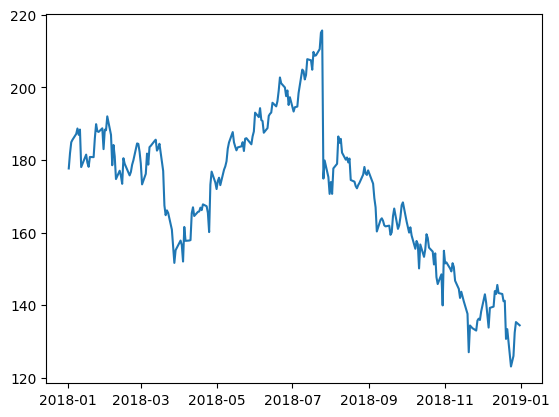

In [5]:
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

plt.plot(fb.index, fb.open)
plt.show()

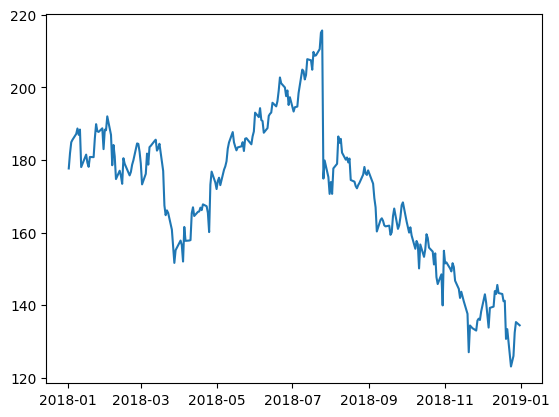

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
plt.plot(fb.index, fb.open)

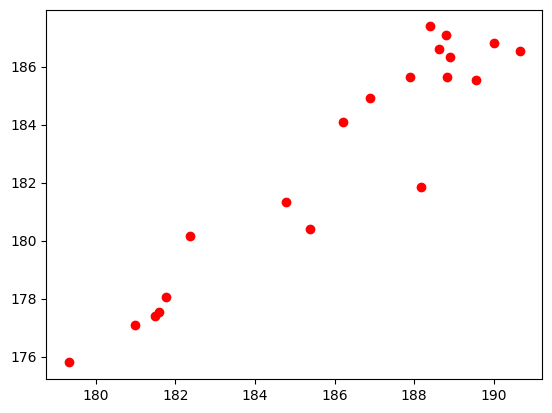

In [7]:
plt.plot('high', 'low', 'or', data=fb.head(20))

(array([6.400e+01, 4.450e+02, 1.137e+03, 1.853e+03, 2.114e+03, 8.070e+02,
        2.800e+02, 9.200e+01, 9.000e+00, 2.000e+00]),
 array([-1.26 , -0.624,  0.012,  0.648,  1.284,  1.92 ,  2.556,  3.192,
         3.828,  4.464,  5.1  ]),
 <BarContainer object of 10 artists>)

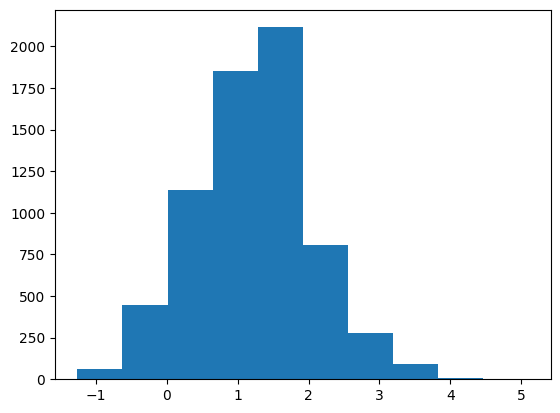

In [8]:
quakes = pd.read_csv('data/earthquakes.csv')
plt.hist(quakes.query('magType == "ml"').mag)

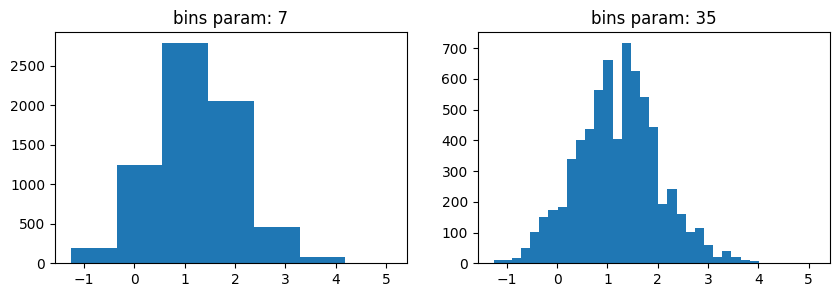

In [9]:
x = quakes.query('magType == "ml"').mag
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for ax, bins in zip(axes, [7, 35]):
    ax.hist(x, bins=bins)
    ax.set_title(f'bins param: {bins}')

In [10]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

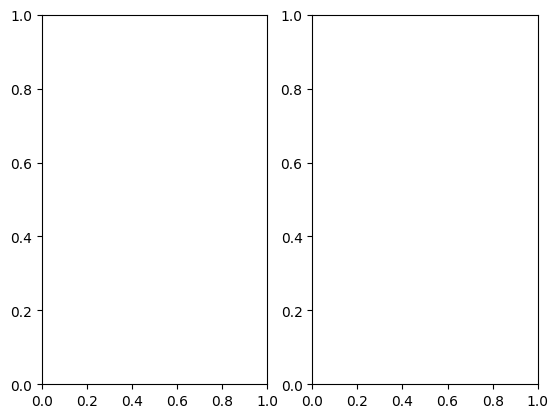

In [11]:
fig, axes = plt.subplots(1, 2)

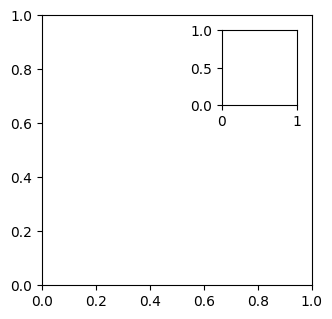

In [12]:
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])

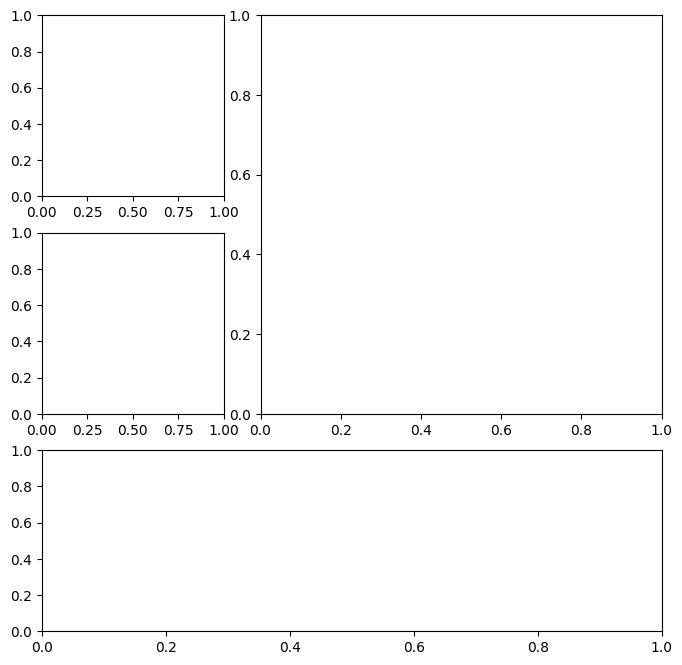

In [13]:
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(3, 3)
top_left = fig.add_subplot(gs[0, 0])
mid_left = fig.add_subplot(gs[1, 0])
top_right = fig.add_subplot(gs[:2, 1:])
bottom = fig.add_subplot(gs[2,:])

In [14]:
fig.savefig('empty.png')

In [15]:
plt.close('all')

In [16]:
fig = plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

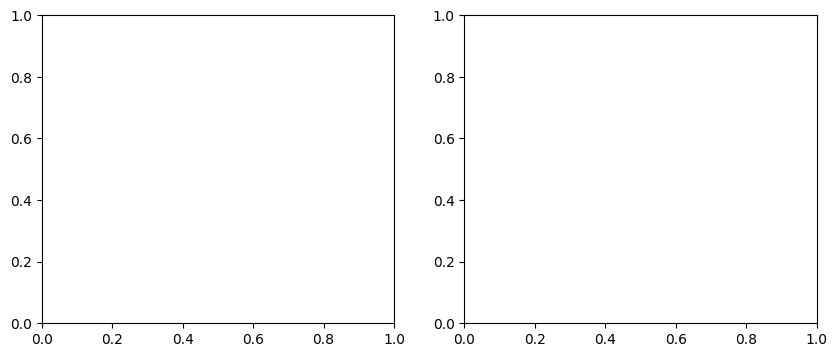

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

In [18]:
import random
import matplotlib as mpl

rcparams_list = list(mpl.rcParams.keys())
random.seed(20) # make this repeatable
random.shuffle(rcparams_list)
sorted(rcparams_list[:20])

['axes.axisbelow',
 'axes.formatter.limits',
 'boxplot.vertical',
 'contour.corner_mask',
 'date.autoformatter.month',
 'legend.labelspacing',
 'lines.dashed_pattern',
 'lines.dotted_pattern',
 'lines.scale_dashes',
 'lines.solid_capstyle',
 'lines.solid_joinstyle',
 'mathtext.tt',
 'patch.linewidth',
 'pdf.fonttype',
 'savefig.jpeg_quality',
 'svg.fonttype',
 'text.latex.preview',
 'toolbar',
 'ytick.labelright',
 'ytick.minor.size']

In [19]:
mpl.rcParams['figure.figsize']

[6.4, 4.8]

In [20]:
mpl.rcParams['figure.figsize'] = (300, 10)
mpl.rcParams['figure.figsize']

[300.0, 10.0]

In [21]:
mpl.rcdefaults()
mpl.rcParams['figure.figsize']

[6.4, 4.8]

In [22]:
plt.rc('figure', figsize=(20, 20)) # change `figsize` default to (20, 20)
plt.rcdefaults() # reset the default

The previous section is an introduction to the use of charts and plots in pandas through the functionality of matplotlib. It discussed plotting line graghs, histograms, and scatter plots. There was a reminder about the importance of bin size when creating histograms. The chapter also discussed subplots ot picture in picture style graghs with several examples of different sizes. Tghis was accomplished using subplot and gridspec. Finally the chapter discussed saving and cleaning data when working with plots this way. I guess because of the way that python saves the files requires extra steps here, but I'm not exactly sure why.

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('data/earthquakes.csv')
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

<AxesSubplot:title={'center':'Evolution of Facebook Open Price'}, xlabel='date'>

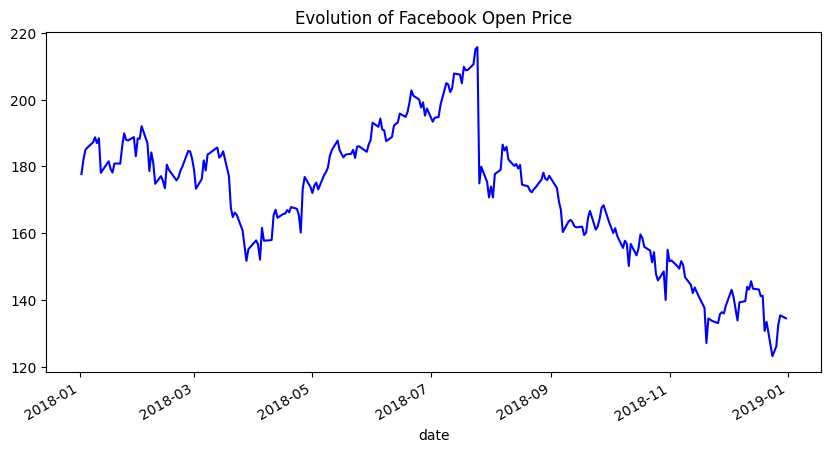

In [24]:
fb.plot(
    kind='line',
    y='open',
    figsize=(10, 5),
    style='-b',
    legend=False,
    title='Evolution of Facebook Open Price'
)

<AxesSubplot:title={'center':'Evolution of Facebook Open Price'}, xlabel='date'>

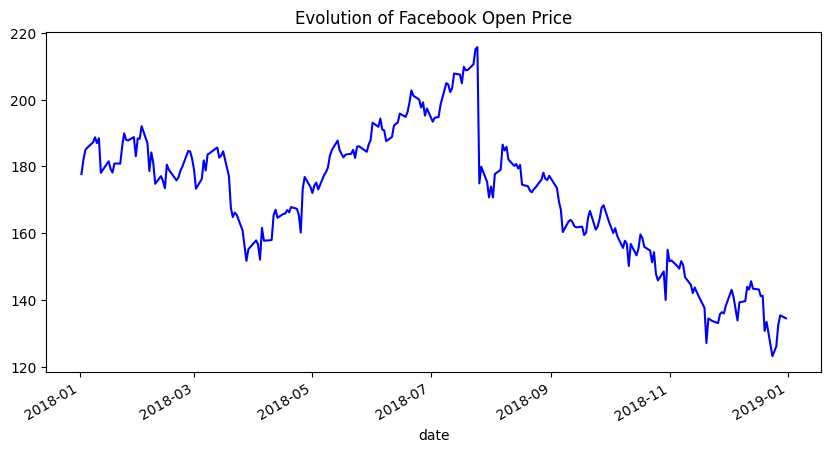

In [25]:
fb.plot(
    kind='line',
    y='open',
    figsize=(10, 5),
    color='blue',
    linestyle='solid',
    legend=False,
    title='Evolution of Facebook Open Price'
)

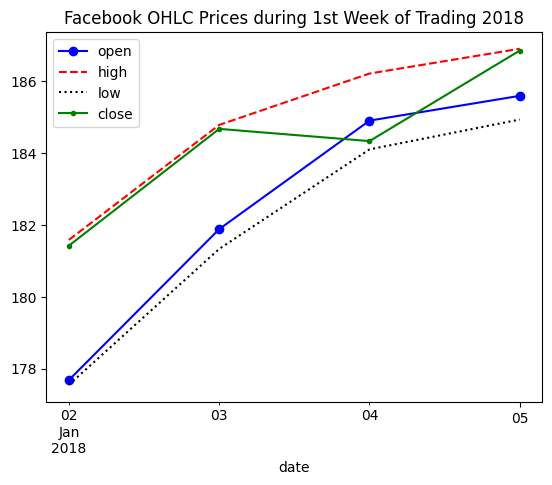

In [26]:
fb.first('1W').plot(
    y=['open', 'high', 'low', 'close'],
    style=['o-b', '--r', ':k', '.-g'],
    title='Facebook OHLC Prices during 1st Week of Trading 2018'
).autoscale()

array([[<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>]],
      dtype=object)

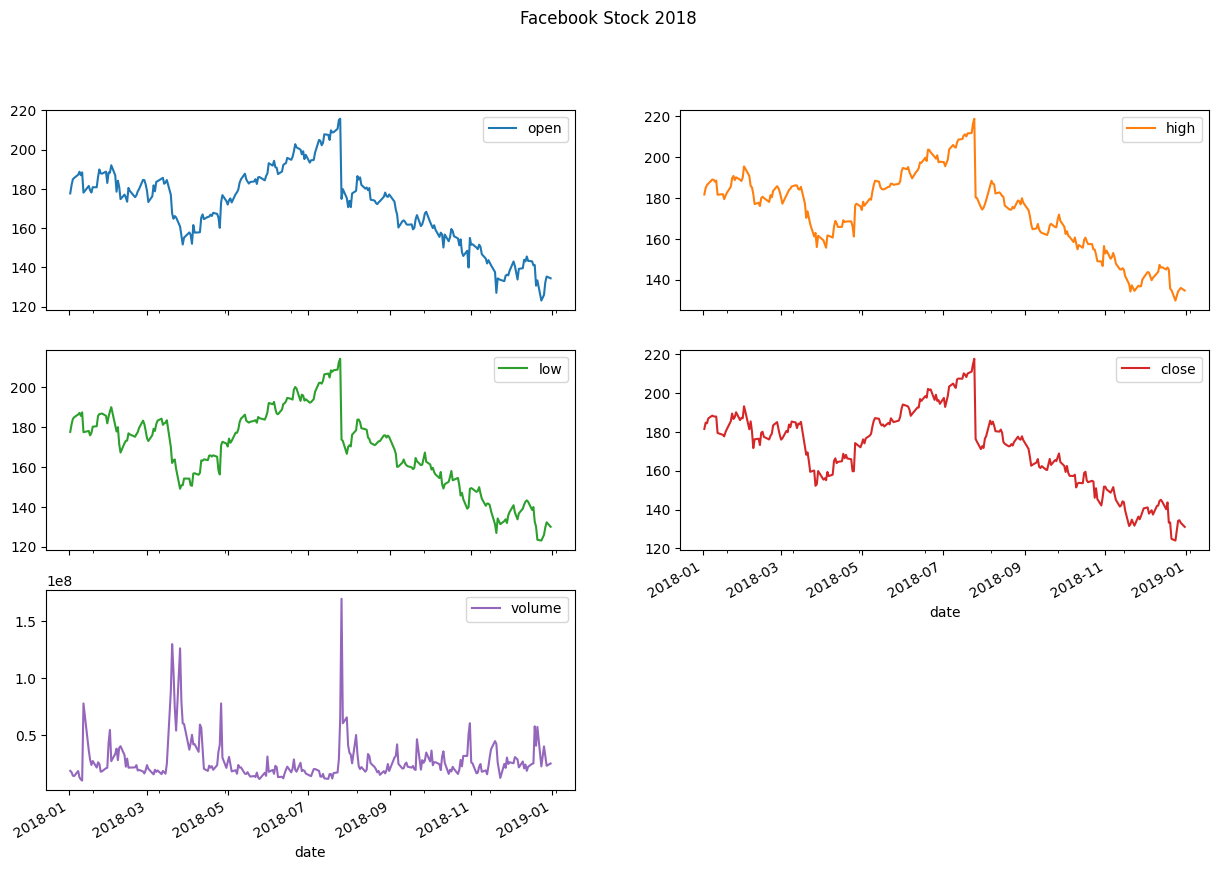

In [27]:
fb.plot(
    kind='line',
    subplots=True,
    layout=(3, 2),
    figsize=(15, 10),
    title='Facebook Stock 2018'
)

In [28]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index, 
    columns='countriesAndTerritories', 
    values='cases'
).rolling(7).mean()

<AxesSubplot:xlabel='date'>

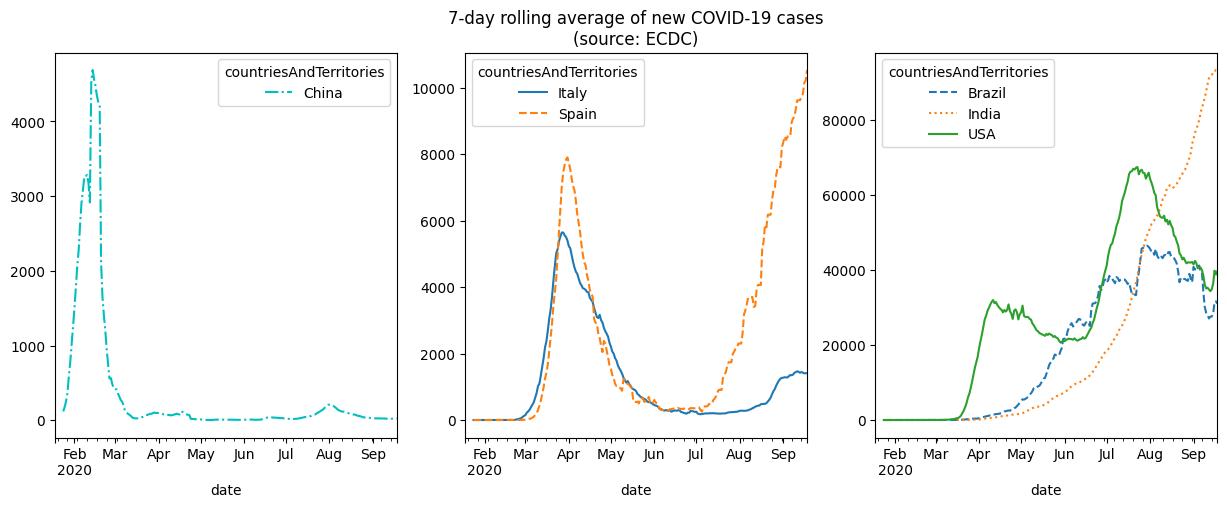

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['China']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['Italy', 'Spain']].plot(
    ax=axes[1], style=['-', '--'], 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Brazil', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

<AxesSubplot:title={'center':'7-day rolling average of new COVID-19 cases\n(source: ECDC)'}, xlabel='date'>

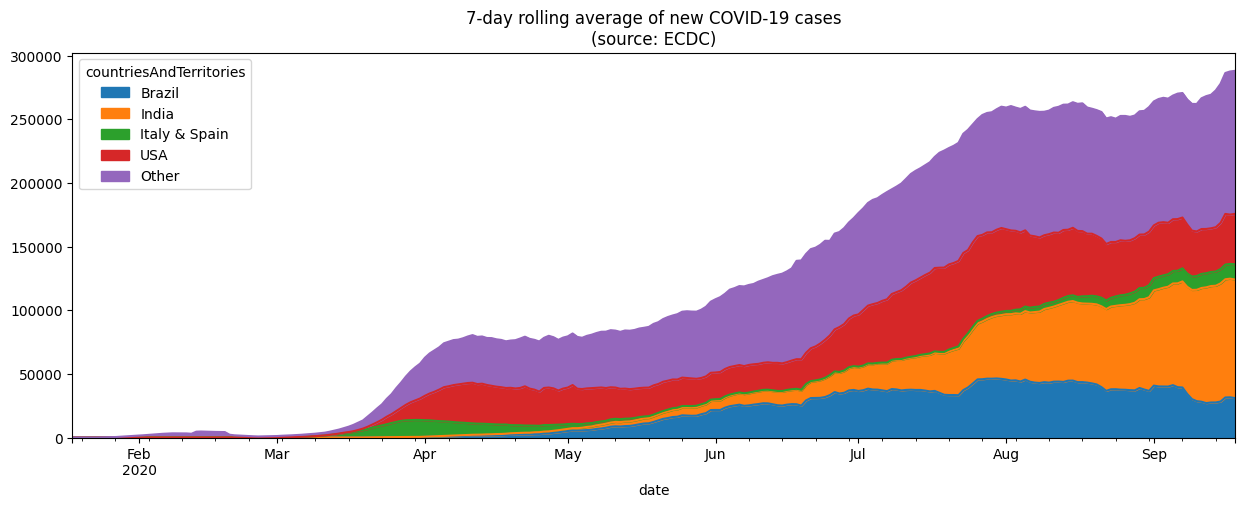

In [30]:
plot_cols = ['Brazil', 'India', 'Italy & Spain', 'USA', 'Other']
grouped = ['Italy', 'Spain']
other_cols = [
    col for col in new_cases_rolling_average.columns 
    if col not in plot_cols
]

new_cases_rolling_average.sort_index(axis=1).assign(
    **{
        'Italy & Spain': lambda x: x[grouped].sum(axis=1),
        'Other': lambda x: x[other_cols].drop(columns=grouped).sum(axis=1)
    }
)[plot_cols].plot(
    kind='area', figsize=(15, 5), 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)

<AxesSubplot:xlabel='date'>

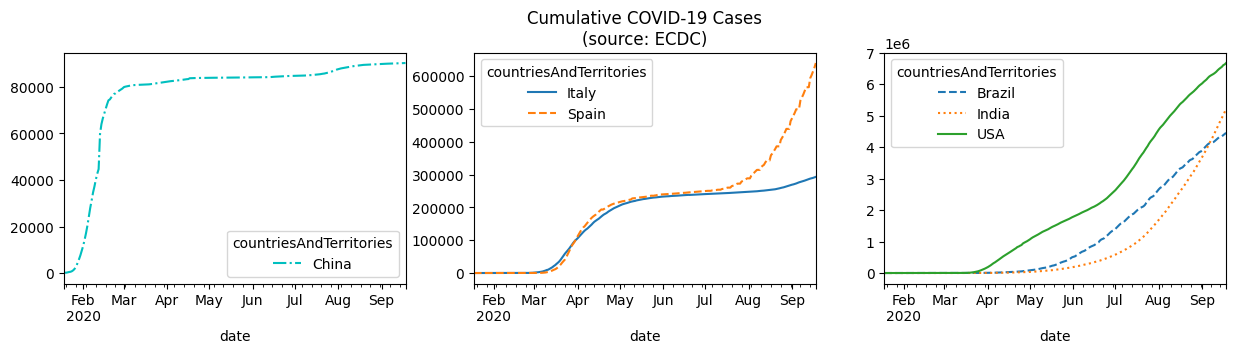

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

cumulative_covid_cases = covid.groupby(
    ['countriesAndTerritories', pd.Grouper(freq='1D')]
).cases.sum().unstack(0).apply('cumsum')

cumulative_covid_cases[['China']].plot(ax=axes[0], style='-.c')
cumulative_covid_cases[['Italy', 'Spain']].plot(
    ax=axes[1], style=['-', '--'], 
    title='Cumulative COVID-19 Cases\n(source: ECDC)'
)
cumulative_covid_cases[['Brazil', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

<AxesSubplot:title={'center':'Facebook Daily High - Low vs. Volume Traded'}, xlabel='volume', ylabel='max_abs_change'>

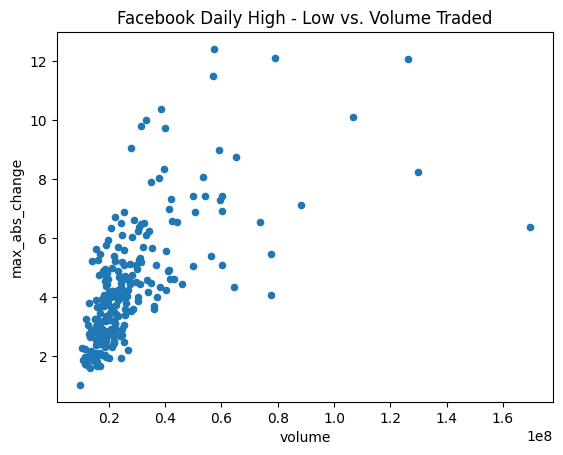

In [32]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. Volume Traded'
)

<AxesSubplot:title={'center':'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

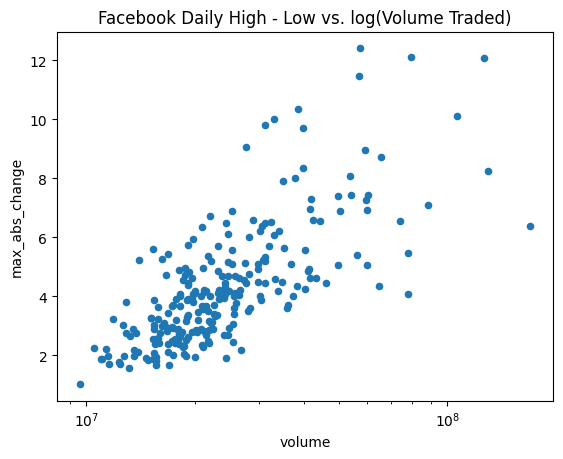

In [33]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)', 
    logx=True
)

<AxesSubplot:title={'center':'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

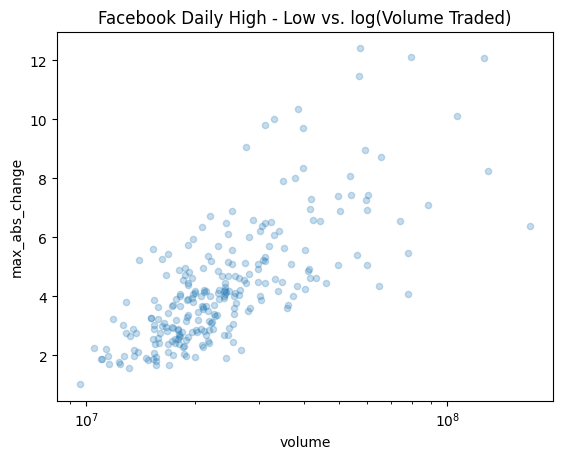

In [34]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    logx=True, alpha=0.25
)

<AxesSubplot:title={'center':'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='log_volume', ylabel='max_abs_change'>

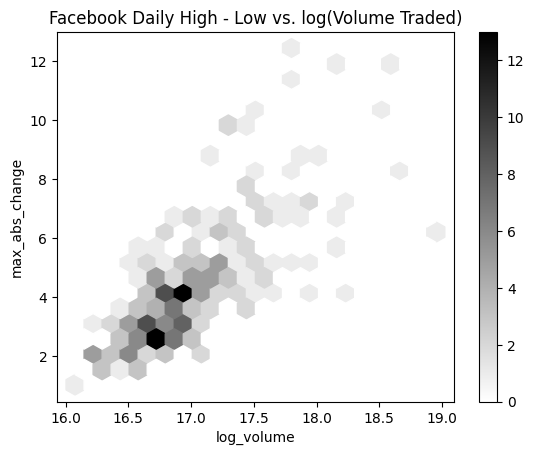

In [35]:
fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).plot(
    kind='hexbin',
    x='log_volume',
    y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    colormap='gray_r',
    gridsize=20, 
    sharex=False # we have to pass this to see the x-axis
)

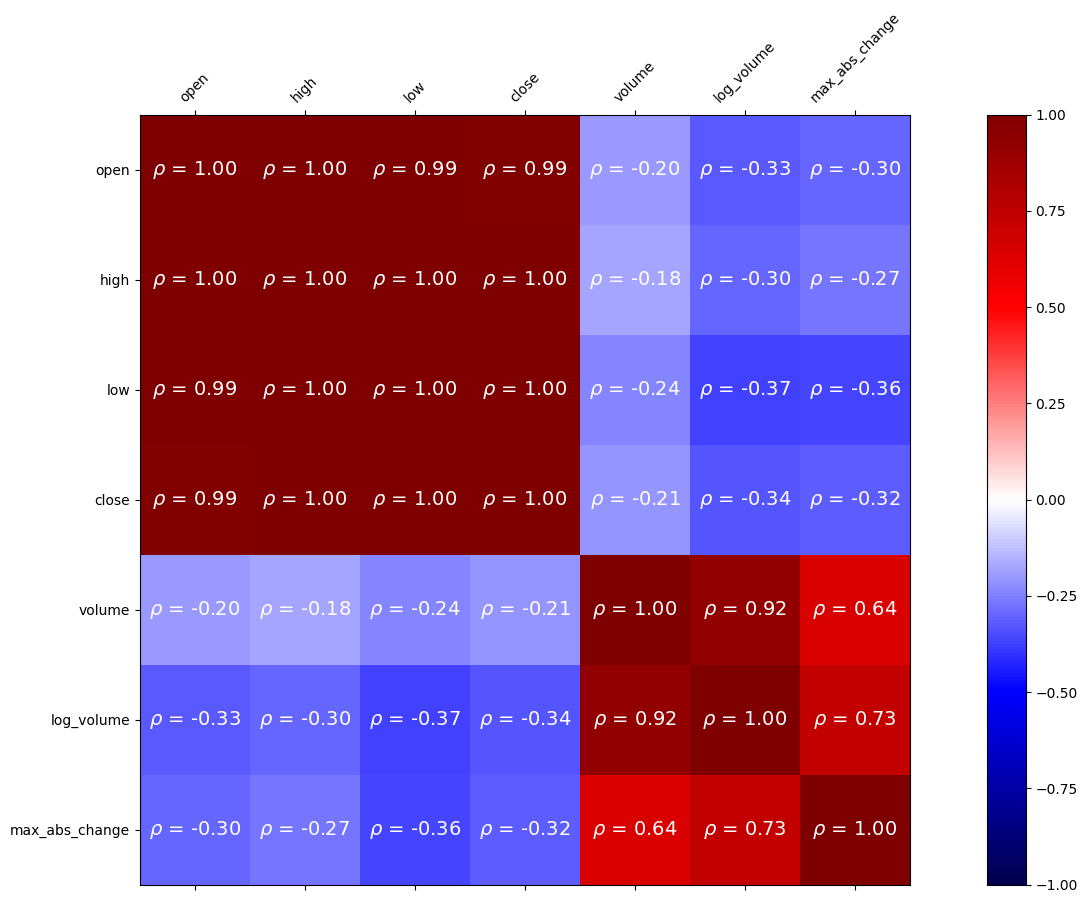

In [36]:
fig, ax = plt.subplots(figsize=(20, 10))

# calculate the correlation matrix
fb_corr = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).corr()

# create the heatmap and colorbar
im = ax.matshow(fb_corr, cmap='seismic')
im.set_clim(-1, 1)
fig.colorbar(im)

# label the ticks with the column names
labels = [col.lower() for col in fb_corr.columns]
ax.set_xticks(ax.get_xticks()[1:-1]) # to handle bug in matplotlib
ax.set_xticklabels(labels, rotation=45)
ax.set_yticks(ax.get_yticks()[1:-1]) # to handle bug in matplotlib
ax.set_yticklabels(labels)

# include the value of the correlation coefficient in the boxes
for (i, j), coef in np.ndenumerate(fb_corr):
    ax.text(
        i, j, fr'$\rho$ = {coef:.2f}', # raw (r), format (f) string
        ha='center', va='center', 
        color='white', fontsize=14
    )

In [37]:
fb_corr.loc['max_abs_change', ['volume', 'log_volume']]

volume        0.642027
log_volume    0.731542
Name: max_abs_change, dtype: float64

Text(0.5, 0, 'Volume traded')

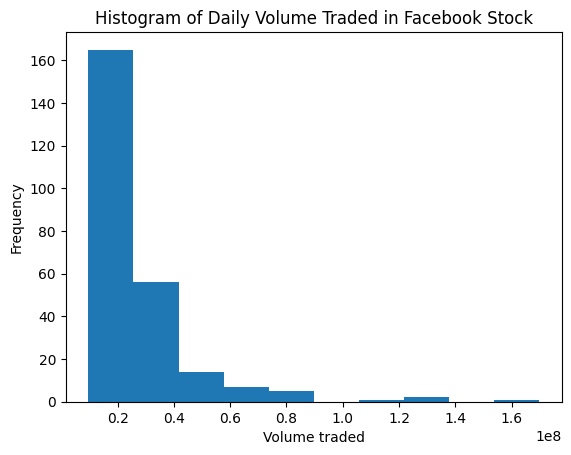

In [38]:
fb.volume.plot(
    kind='hist', 
    title='Histogram of Daily Volume Traded in Facebook Stock'
)
plt.xlabel('Volume traded') # label the x-axis (discussed in chapter 6)

Text(0.5, 0, 'magnitude')

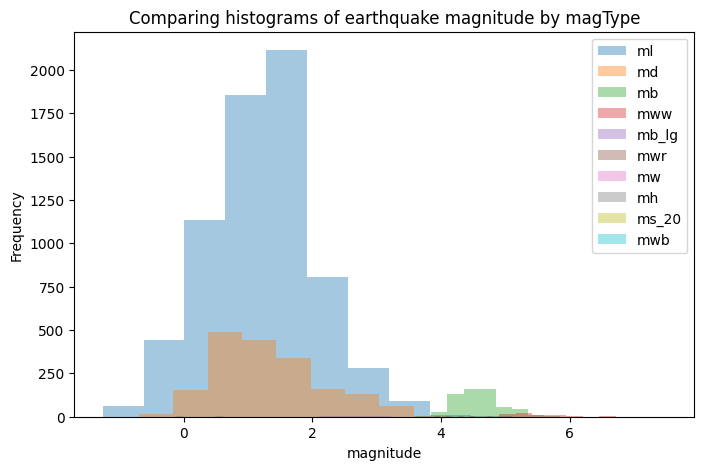

In [39]:
fig, axes = plt.subplots(figsize=(8, 5))

for magtype in quakes.magType.unique():
    data = quakes.query(f'magType == "{magtype}"').mag
    if not data.empty:
        data.plot(
            kind='hist', ax=axes, alpha=0.4, 
            label=magtype, legend=True,
            title='Comparing histograms of earthquake magnitude by magType'
        )

plt.xlabel('magnitude') # label the x-axis (discussed in chapter 6)

Text(0.5, 0, 'Price ($)')

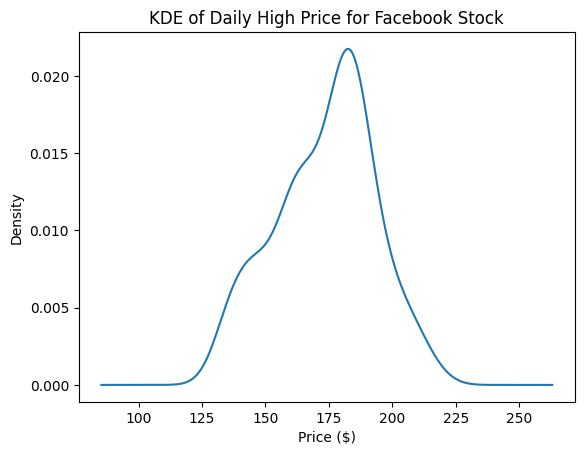

In [40]:
fb.high.plot(
    kind='kde', 
    title='KDE of Daily High Price for Facebook Stock'
)
plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)

Text(0.5, 0, 'Price ($)')

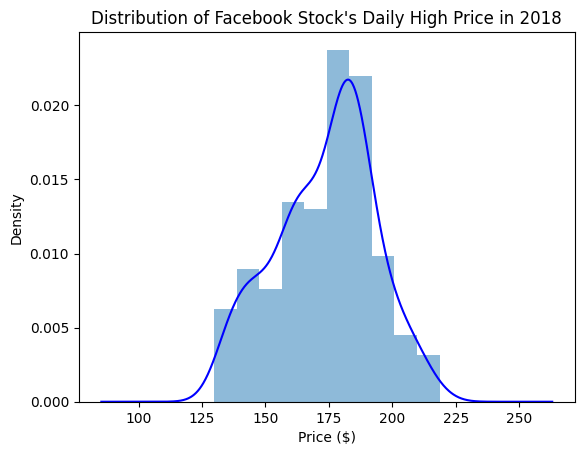

In [41]:
ax = fb.high.plot(kind='hist', density=True, alpha=0.5)
fb.high.plot(
    ax=ax, kind='kde', color='blue', 
    title='Distribution of Facebook Stock\'s Daily High Price in 2018'
)
plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)

Text(0.5, 1.0, 'ECDF of earthquake magnitude with magType ml')

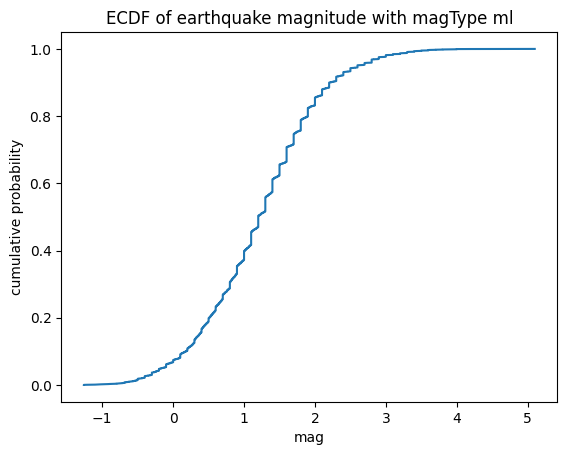

In [42]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

# axis labels (we will cover this in chapter 6)
plt.xlabel('mag') # add x-axis label 
plt.ylabel('cumulative probability') # add y-axis label

# add title (we will cover this in chapter 6)
plt.title('ECDF of earthquake magnitude with magType ml')

Text(0.5, 1.0, 'P(mag <= 3) = 98%')

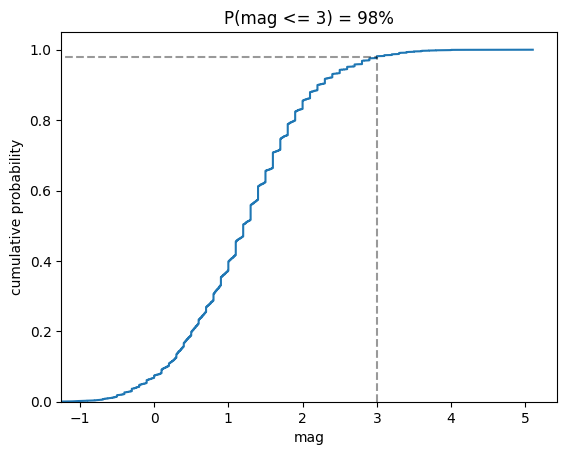

In [43]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

# formatting below will all be covered in chapter 6
# axis labels
plt.xlabel('mag') # add x-axis label 
plt.ylabel('cumulative probability') # add y-axis label

# add reference lines for interpreting the ECDF for mag <= 3 
plt.plot(
    [3, 3], [0, .98], '--k', 
    [-1.5, 3], [0.98, 0.98], '--k', alpha=0.4
)

# set axis ranges
plt.ylim(0, None)
plt.xlim(-1.25, None)

# add a title
plt.title('P(mag <= 3) = 98%')

Text(0, 0.5, 'price ($)')

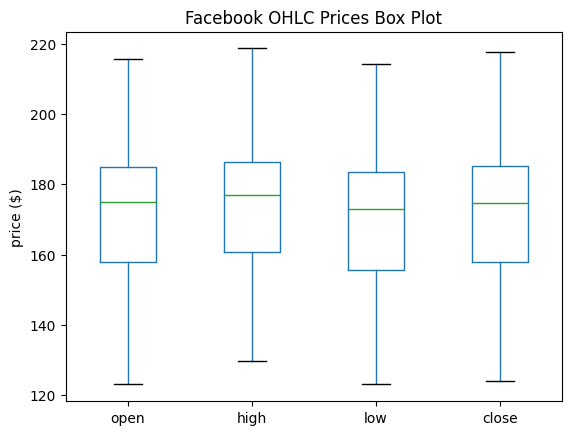

In [44]:
fb.iloc[:,:4].plot(kind='box', title='Facebook OHLC Prices Box Plot')
plt.ylabel('price ($)') # label the y-axis (discussed in chapter 6)

Text(0, 0.5, 'price ($)')

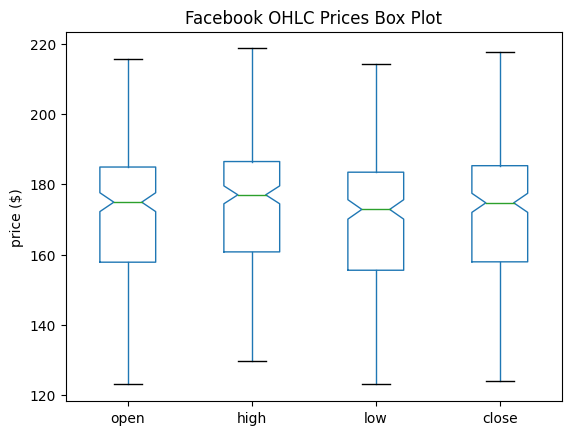

In [45]:
fb.iloc[:,:4].plot(kind='box', title='Facebook OHLC Prices Box Plot', notch=True)
plt.ylabel('price ($)') # label the y-axis (discussed in chapter 6)

Text(0.5, 1.1, 'Facebook OHLC Box Plots by Volume Traded')

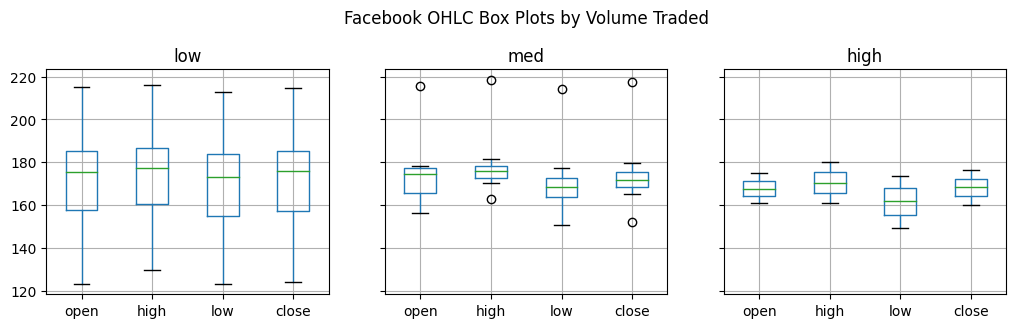

In [46]:
fb.assign(
    volume_bin=pd.cut(fb.volume, 3, labels=['low', 'med', 'high'])
).groupby('volume_bin').boxplot(
    column=['open', 'high', 'low', 'close'],
    layout=(1, 3), figsize=(12, 3)
)
plt.suptitle('Facebook OHLC Box Plots by Volume Traded', y=1.1)

Text(0, 0.5, 'magnitude')

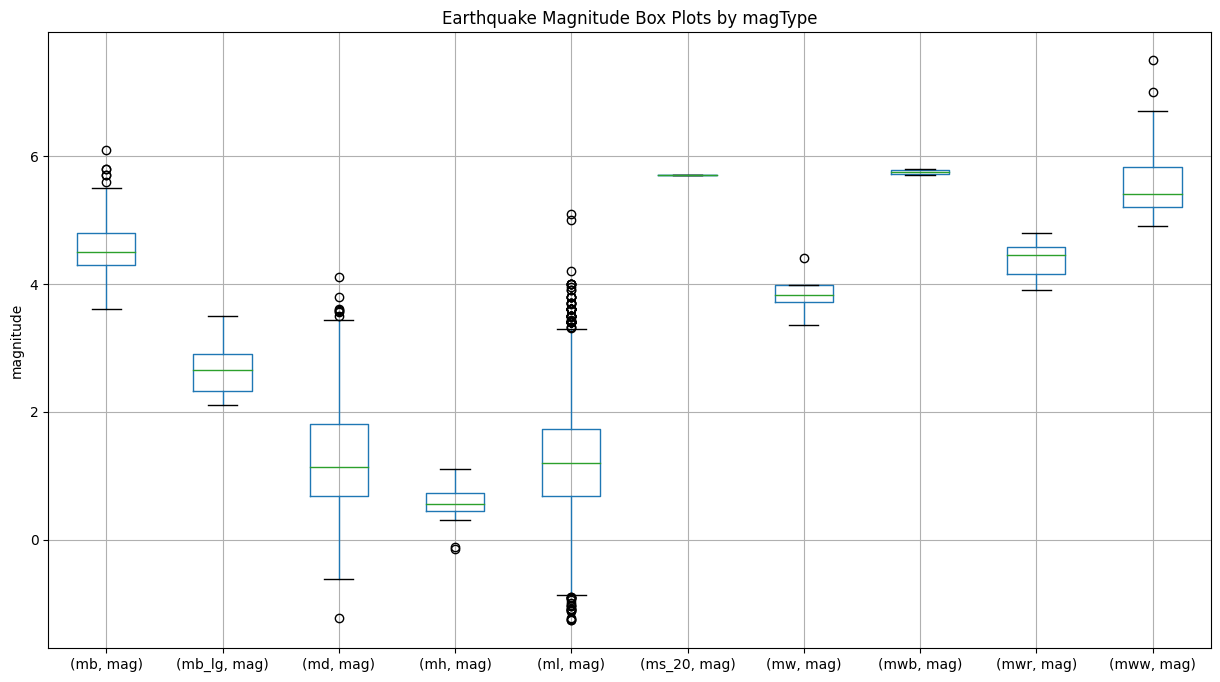

In [47]:
quakes[['mag', 'magType']].groupby('magType').boxplot(
    figsize=(15, 8), subplots=False
)
plt.title('Earthquake Magnitude Box Plots by magType')
plt.ylabel('magnitude') # label the y-axis (discussed in chapter 6)

Text(0.5, 0, 'earthquakes')

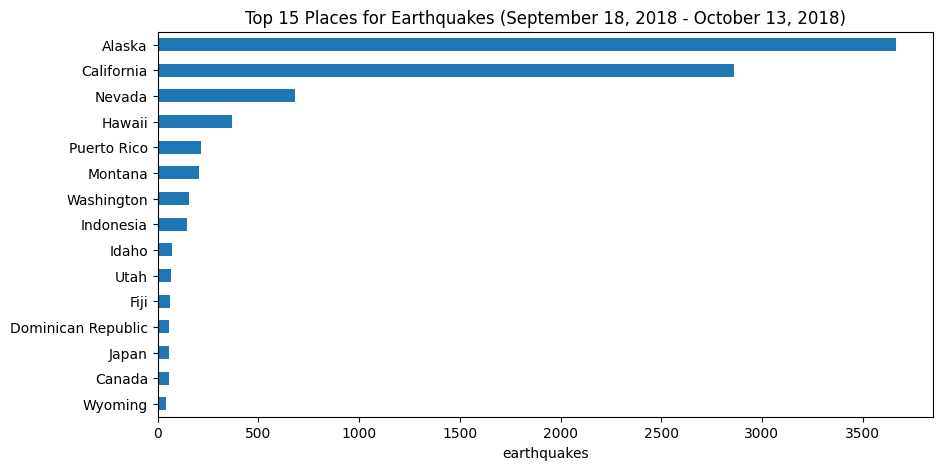

In [48]:
quakes.parsed_place.value_counts().iloc[14::-1,].plot(
    kind='barh', figsize=(10, 5),
    title='Top 15 Places for Earthquakes '
          '(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('earthquakes') # label the x-axis (discussed in chapter 6)

Text(0.5, 0, 'tsunamis')

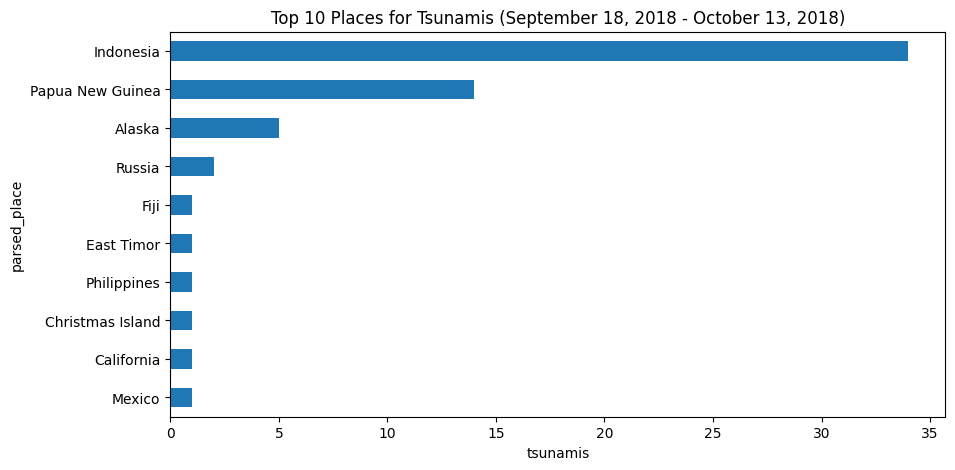

In [49]:
quakes.groupby('parsed_place').tsunami.sum().sort_values().iloc[-10:,].plot(
    kind='barh', figsize=(10, 5), 
    title='Top 10 Places for Tsunamis '
          '(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('tsunamis') # label the x-axis (discussed in chapter 6)

Text(0, 0.5, 'count')

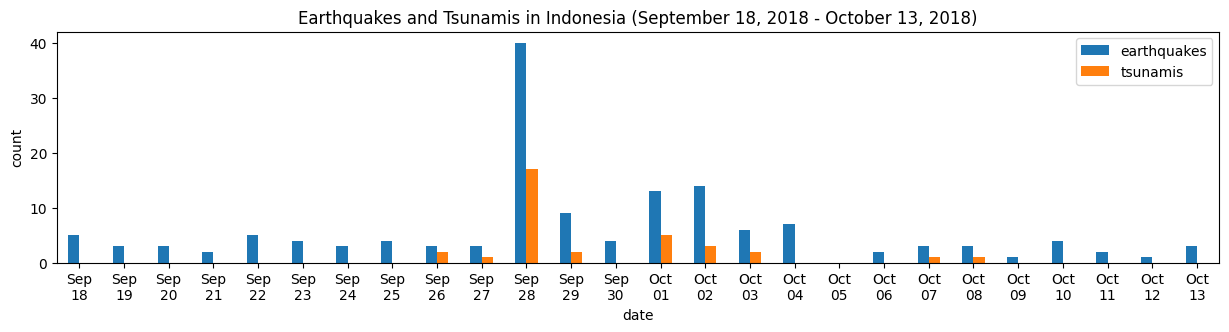

In [50]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes.plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), 
    rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)'
)

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

Text(0, 0.5, '')

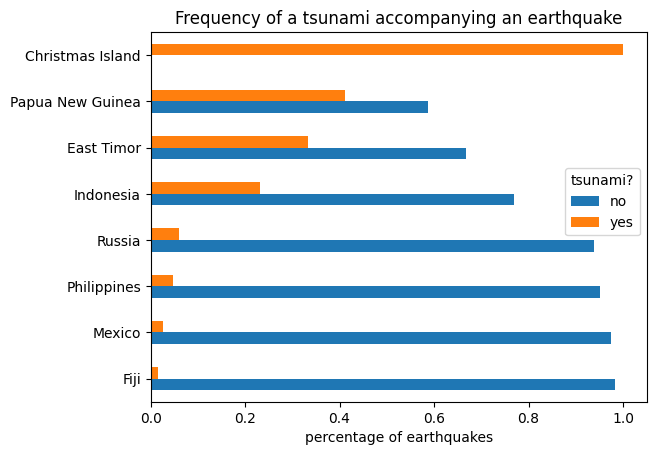

In [51]:
quakes.groupby(['parsed_place', 'tsunami']).mag.count()\
    .unstack().apply(lambda x: x / x.sum(), axis=1)\
    .rename(columns={0: 'no', 1: 'yes'})\
    .sort_values('yes', ascending=False)[7::-1]\
    .plot.barh(
        title='Frequency of a tsunami accompanying an earthquake'
    )

# move legend to the right of the plot
plt.legend(title='tsunami?', bbox_to_anchor=(1, 0.65))

# label the axes (discussed in chapter 6)
plt.xlabel('percentage of earthquakes')
plt.ylabel('')

Text(0, 0.5, 'earthquakes')

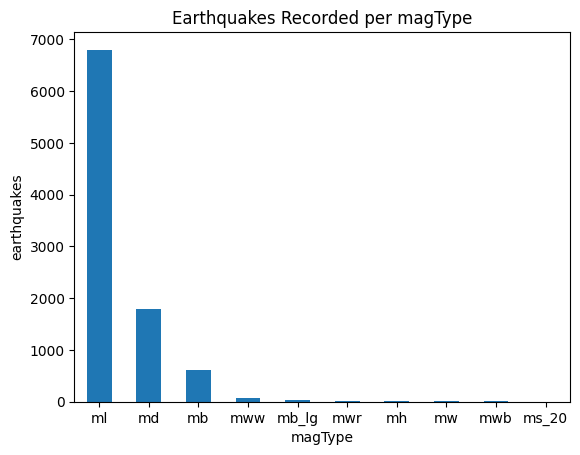

In [52]:
quakes.magType.value_counts().plot(
    kind='bar', title='Earthquakes Recorded per magType', rot=0
)

# label the axes (discussed in chapter 6)
plt.xlabel('magType')
plt.ylabel('earthquakes')

<AxesSubplot:title={'center':'Earthquakes by integer magnitude and magType'}, xlabel='mag_bin', ylabel='earthquakes'>

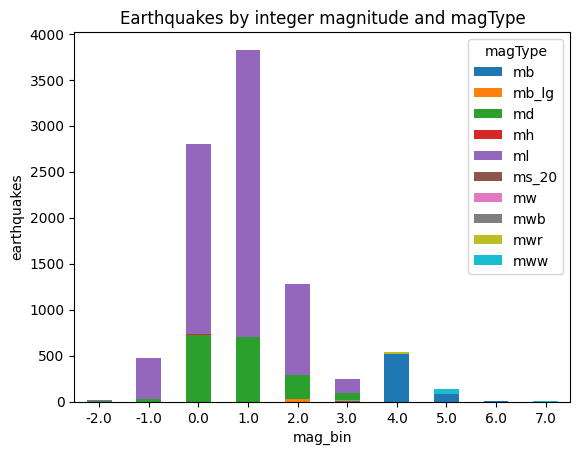

In [53]:
pivot = quakes.assign(
    mag_bin=lambda x: np.floor(x.mag)
).pivot_table(
    index='mag_bin', columns='magType', values='mag', aggfunc='count'
)
pivot.plot.bar(
    stacked=True, rot=0, ylabel='earthquakes', 
    title='Earthquakes by integer magnitude and magType'
)

Text(0, 0.5, 'percentage')

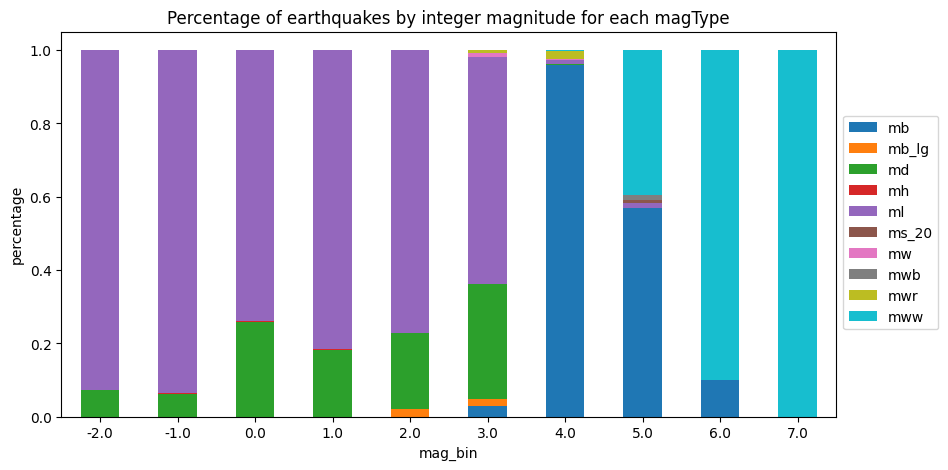

In [54]:
normalized_pivot = pivot.fillna(0).apply(lambda x: x / x.sum(), axis=1)
ax = normalized_pivot.plot.bar(
    stacked=True, rot=0, figsize=(10, 5),
    title='Percentage of earthquakes by integer magnitude for each magType'
)
ax.legend(bbox_to_anchor=(1, 0.8)) # move legend to the right of the plot
plt.ylabel('percentage') # label the y-axis (discussed in chapter 6)

Text(0, 0.5, '')

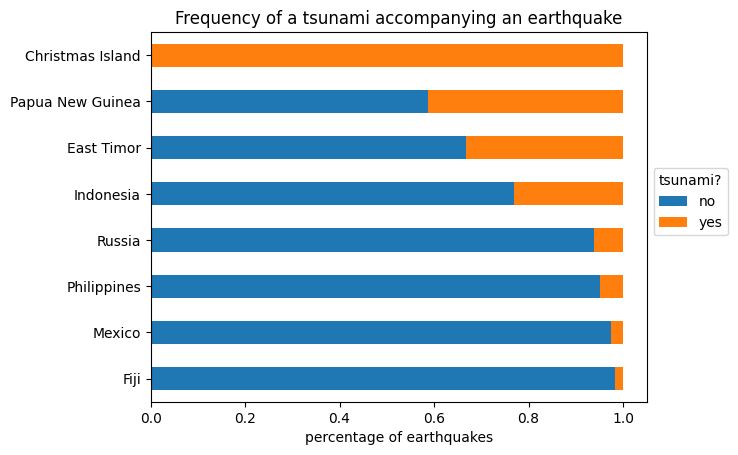

In [55]:
quakes.groupby(['parsed_place', 'tsunami']).mag.count()\
    .unstack().apply(lambda x: x / x.sum(), axis=1)\
    .rename(columns={0: 'no', 1: 'yes'})\
    .sort_values('yes', ascending=False)[7::-1]\
    .plot.barh(
        title='Frequency of a tsunami accompanying an earthquake', 
        stacked=True
    )

# move legend to the right of the plot
plt.legend(title='tsunami?', bbox_to_anchor=(1, 0.65))

# label the axes (discussed in chapter 6)
plt.xlabel('percentage of earthquakes')
plt.ylabel('')

The previous section covers the plot method in pandas. This powerful set of functions where many of the parameters get passed down to matplotlib. The text shows how line graghs are good at showing progression over time. It continues by giving a seris of examples on how to create subplots of these graghs. The next topic discussed shwoing relationships between variables using scatter plots and different methods to increase readability like adding transparency or a weighted hexbin grid. The section showed correlation heatmap graghs and how to create and interpret them. It then went on to illustrate visulaizing distributions through histograms. Kernel desnisty estimation was plotted over the histogram plot, and it also showed how to plot the ECDF. The final parts discusses bar charts and box plots and shows methods for graghing and interpreting these types.

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

array([[<AxesSubplot:xlabel='open', ylabel='open'>,
        <AxesSubplot:xlabel='high', ylabel='open'>,
        <AxesSubplot:xlabel='low', ylabel='open'>,
        <AxesSubplot:xlabel='close', ylabel='open'>,
        <AxesSubplot:xlabel='volume', ylabel='open'>],
       [<AxesSubplot:xlabel='open', ylabel='high'>,
        <AxesSubplot:xlabel='high', ylabel='high'>,
        <AxesSubplot:xlabel='low', ylabel='high'>,
        <AxesSubplot:xlabel='close', ylabel='high'>,
        <AxesSubplot:xlabel='volume', ylabel='high'>],
       [<AxesSubplot:xlabel='open', ylabel='low'>,
        <AxesSubplot:xlabel='high', ylabel='low'>,
        <AxesSubplot:xlabel='low', ylabel='low'>,
        <AxesSubplot:xlabel='close', ylabel='low'>,
        <AxesSubplot:xlabel='volume', ylabel='low'>],
       [<AxesSubplot:xlabel='open', ylabel='close'>,
        <AxesSubplot:xlabel='high', ylabel='close'>,
        <AxesSubplot:xlabel='low', ylabel='close'>,
        <AxesSubplot:xlabel='close', ylabel='close'>,
    

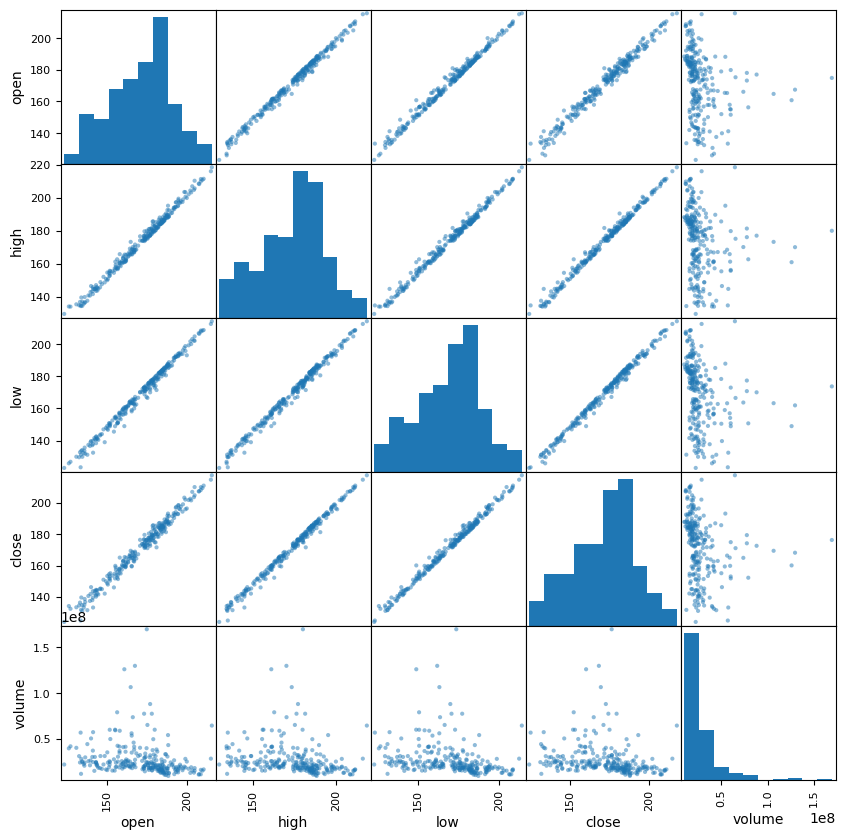

In [57]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10))

array([[<AxesSubplot:xlabel='open', ylabel='open'>,
        <AxesSubplot:xlabel='high', ylabel='open'>,
        <AxesSubplot:xlabel='low', ylabel='open'>,
        <AxesSubplot:xlabel='close', ylabel='open'>,
        <AxesSubplot:xlabel='volume', ylabel='open'>],
       [<AxesSubplot:xlabel='open', ylabel='high'>,
        <AxesSubplot:xlabel='high', ylabel='high'>,
        <AxesSubplot:xlabel='low', ylabel='high'>,
        <AxesSubplot:xlabel='close', ylabel='high'>,
        <AxesSubplot:xlabel='volume', ylabel='high'>],
       [<AxesSubplot:xlabel='open', ylabel='low'>,
        <AxesSubplot:xlabel='high', ylabel='low'>,
        <AxesSubplot:xlabel='low', ylabel='low'>,
        <AxesSubplot:xlabel='close', ylabel='low'>,
        <AxesSubplot:xlabel='volume', ylabel='low'>],
       [<AxesSubplot:xlabel='open', ylabel='close'>,
        <AxesSubplot:xlabel='high', ylabel='close'>,
        <AxesSubplot:xlabel='low', ylabel='close'>,
        <AxesSubplot:xlabel='close', ylabel='close'>,
    

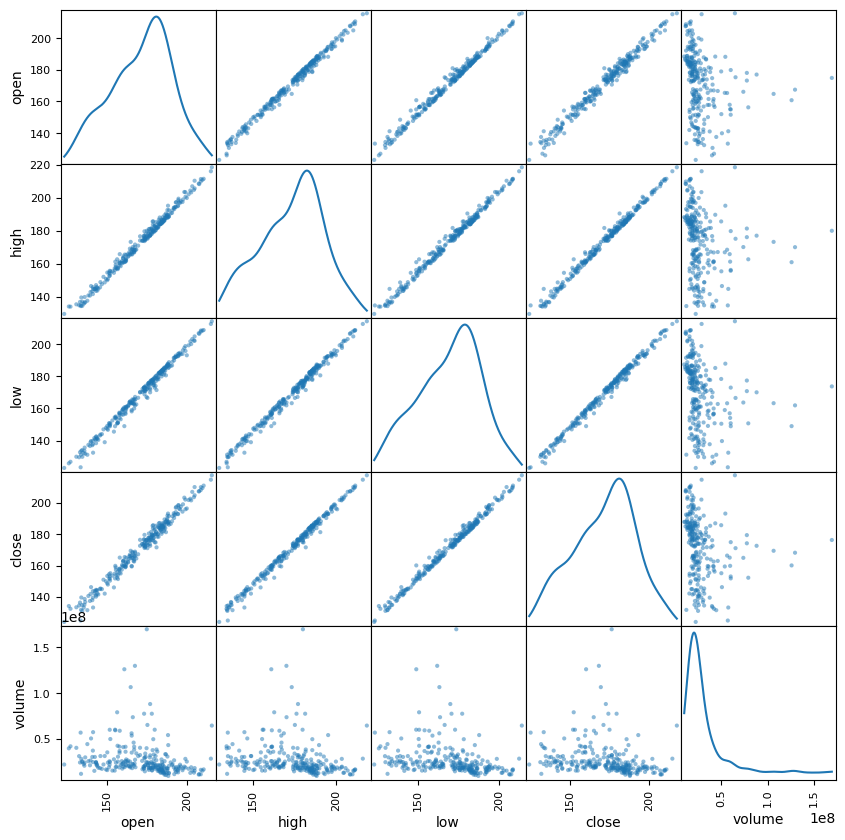

In [58]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

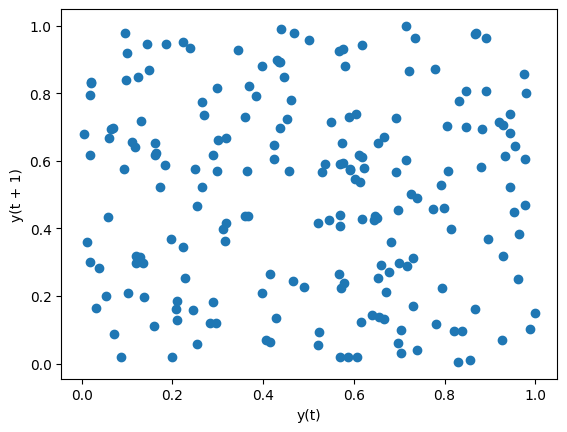

In [59]:
from pandas.plotting import lag_plot
np.random.seed(0) # make this repeatable
lag_plot(pd.Series(np.random.random(size=200)))

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

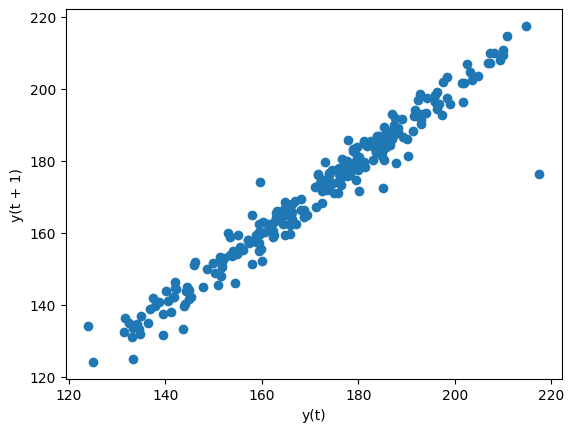

In [60]:
lag_plot(fb.close)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 5)'>

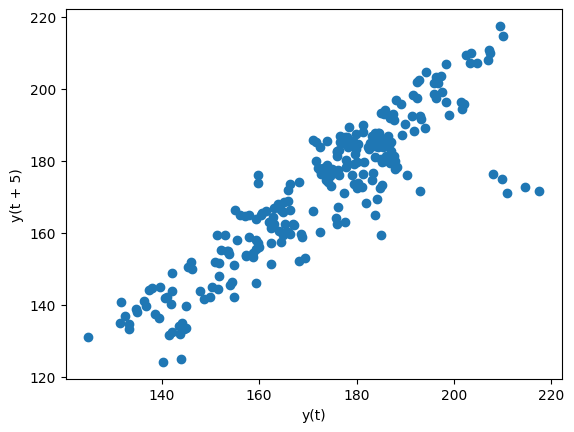

In [61]:
lag_plot(fb.close, lag=5)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

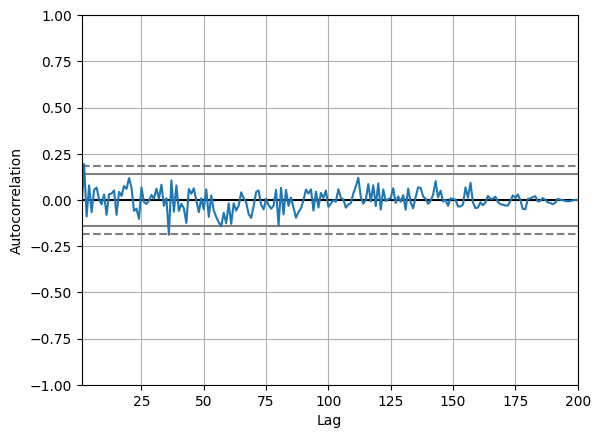

In [62]:
from pandas.plotting import autocorrelation_plot
np.random.seed(0) # make this repeatable
autocorrelation_plot(pd.Series(np.random.random(size=200)))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

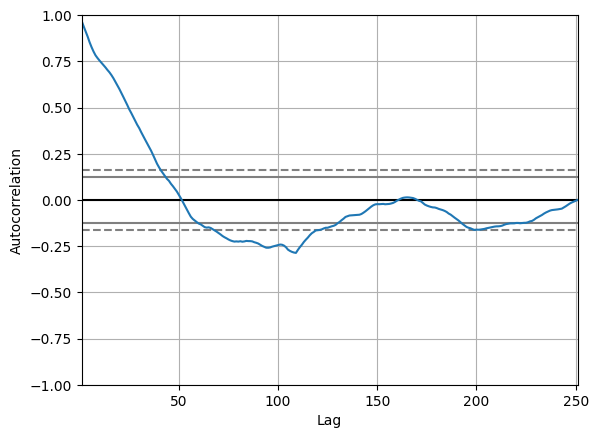

In [63]:
autocorrelation_plot(fb.close)

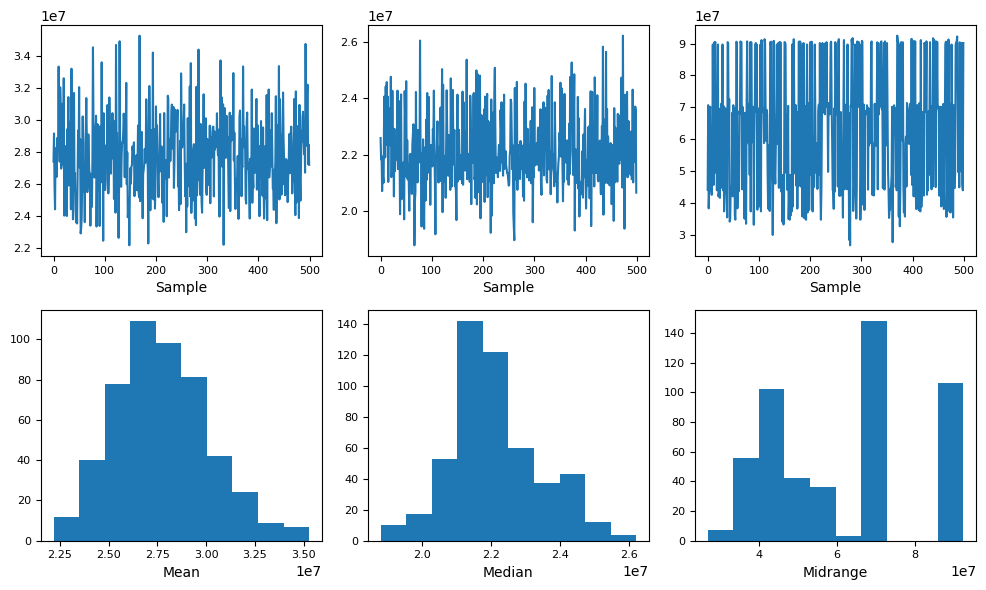

In [64]:
from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))

The final section in this chapter explores additiona plandas plotting modules. After importing the data a scatter matrix was made showing the relationship between all the columns in the data set. There was an explanation of lag plots and the information that they can give shwoing an example of very low correlatio data a nd highly correlated data. Autocorrelation plots were used to demonstrate another way of visualizing correlation, the bootstrap plot heps understand the uncertainty in the summary statistics. 

excercise 1: Plot the rolling 20-day minimum of the Facebook closing price using pandas

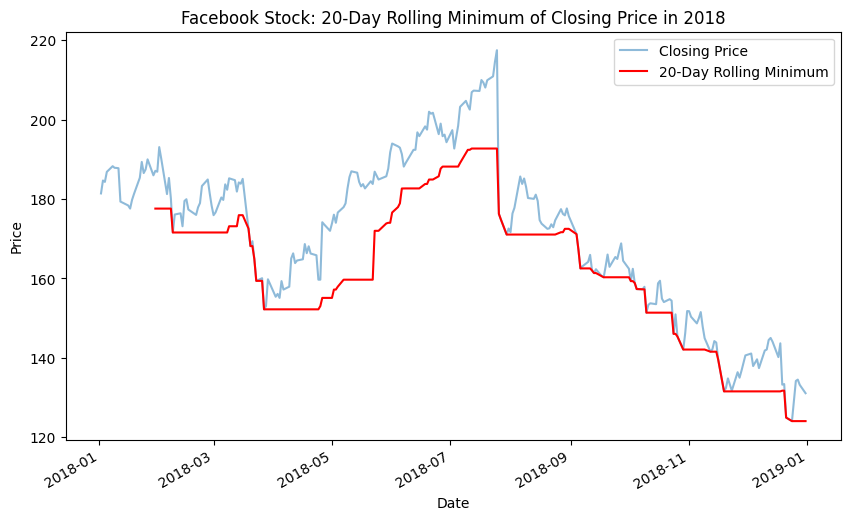

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

fb = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

fb['20_day_min'] = fb['close'].rolling(window=20).min()

plt.figure(figsize=(10, 6))
fb['close'].plot(label='Closing Price', alpha=0.5)
fb['20_day_min'].plot(label='20-Day Rolling Minimum', color='red')

plt.title('Facebook Stock: 20-Day Rolling Minimum of Closing Price in 2018')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

Question 2:  Create a histogram and KDE of the change from open to close in the price of Facebook stock

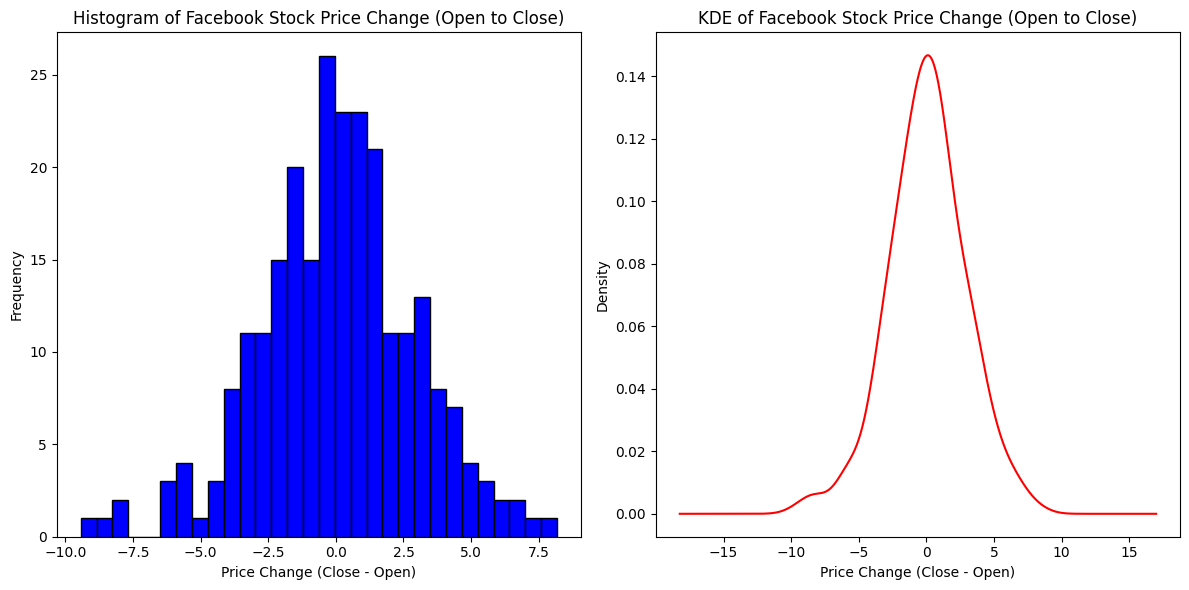

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

fb = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

fb['price_change'] = fb['close'] - fb['open']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
fb['price_change'].plot(kind='hist', bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Facebook Stock Price Change (Open to Close)')
plt.xlabel('Price Change (Close - Open)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
fb['price_change'].plot(kind='kde', color='red')
plt.title('KDE of Facebook Stock Price Change (Open to Close)')
plt.xlabel('Price Change (Close - Open)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

Question 3:  Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia

<Figure size 1000x600 with 0 Axes>

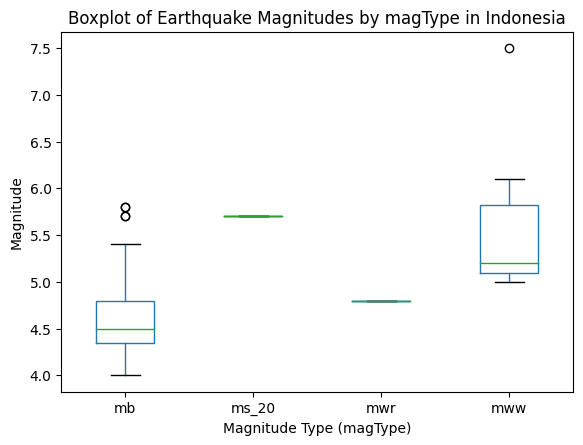

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

quakes = pd.read_csv('data/earthquakes.csv')

indonesia_quakes = quakes[quakes['parsed_place'].str.contains('Indonesia', na=False)]

plt.figure(figsize=(10, 6))
indonesia_quakes.boxplot(column='mag', by='magType', grid=False)

plt.title('Boxplot of Earthquake Magnitudes by magType in Indonesia')
plt.suptitle('')  # Remove the automatic boxplot title
plt.xlabel('Magnitude Type (magType)')
plt.ylabel('Magnitude')

plt.show()

Question 4:  Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.

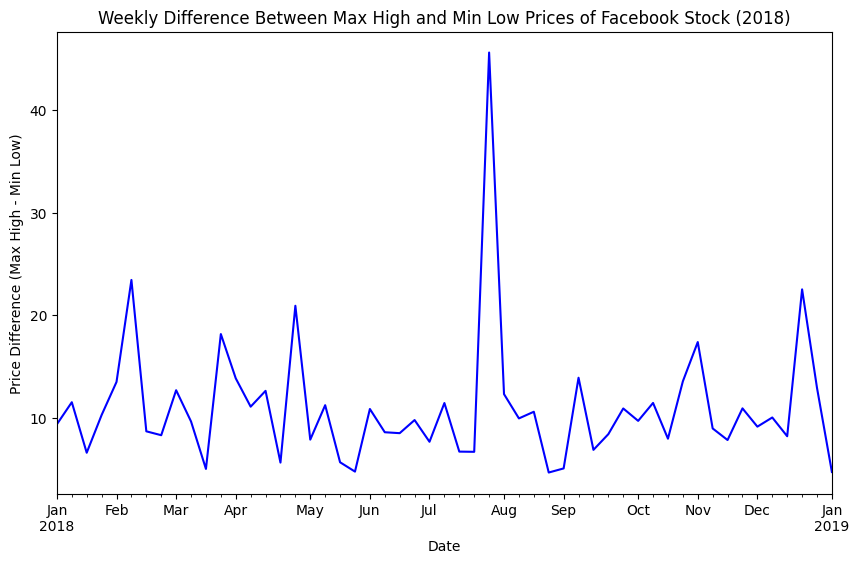

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

fb = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

weekly_high = fb['high'].resample('W').max()
weekly_low = fb['low'].resample('W').min()

weekly_difference = weekly_high - weekly_low

plt.figure(figsize=(10, 6))
weekly_difference.plot(color='blue')

plt.title('Weekly Difference Between Max High and Min Low Prices of Facebook Stock (2018)')
plt.xlabel('Date')
plt.ylabel('Price Difference (Max High - Min Low)')

plt.show()


Question 5:  Plot the 14-day moving average of the daily change in new COVID-19 cases in Brazil, China, India, Italy, Spain, and the USA:
    a) First, use the diff() method that was introduced in the Working with time series data section of Chapter 4, Aggregating Pandas DataFrames, to calculate the day-over-day change in new cases. Then, use rolling() to calculate the 14-day moving average.
    b) Make three subplots: one for China; one for Spain and Italy; and one for Brazil, India, and the USA.

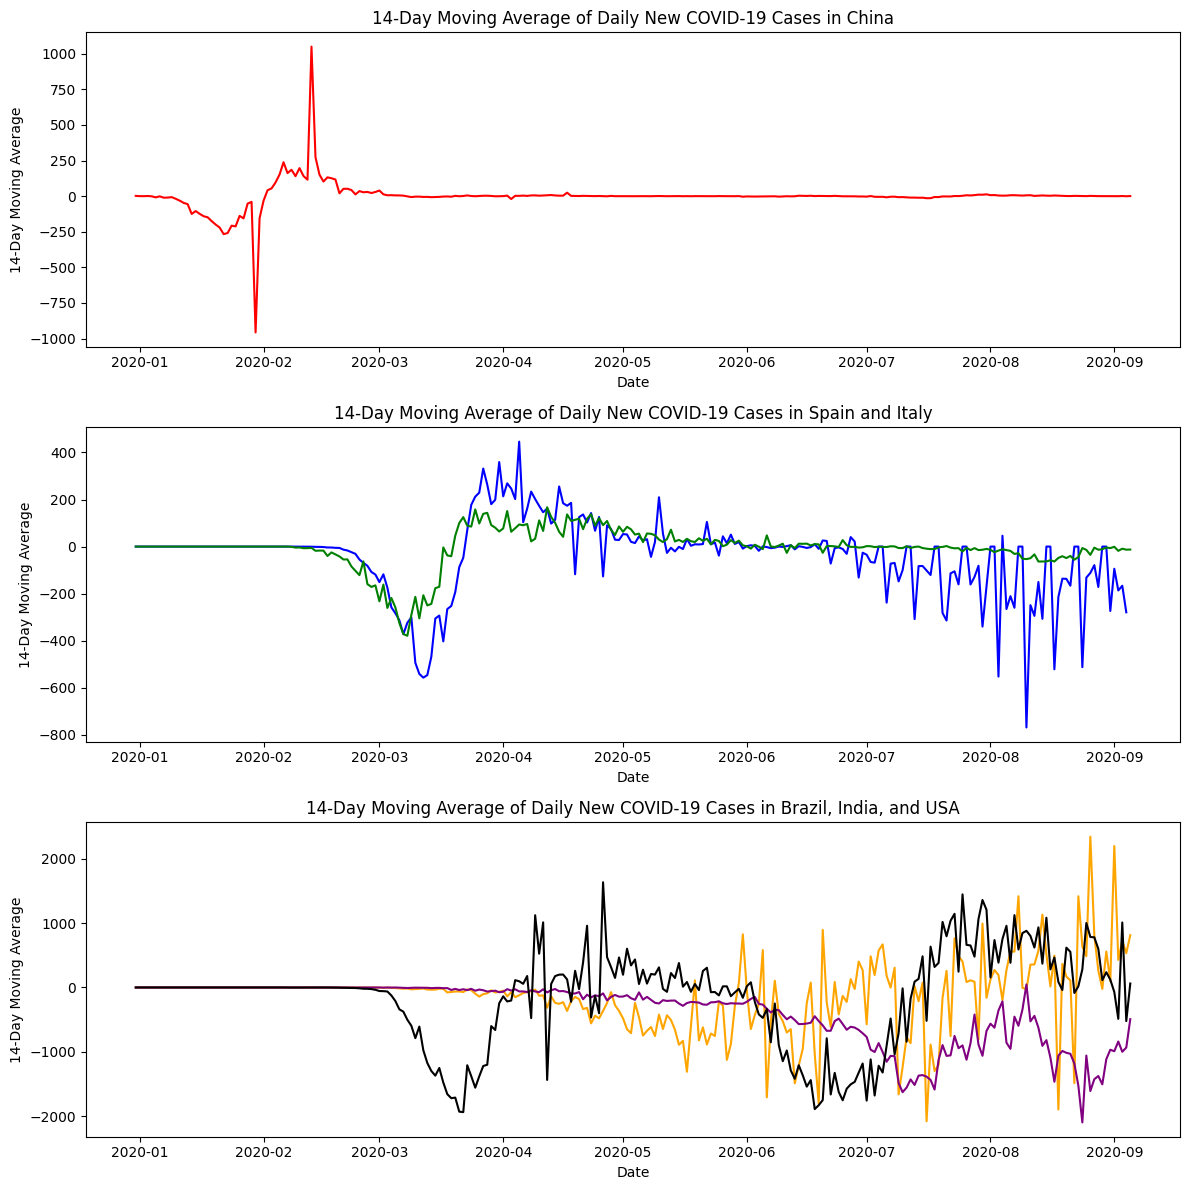

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

covid = pd.read_csv('data/covid19_cases.csv')

covid['date'] = pd.to_datetime(covid['dateRep'], format='%d/%m/%Y')
covid.set_index('date', inplace=True)

covid['countriesAndTerritories'] = covid['countriesAndTerritories'].replace({
    'United_States_of_America': 'USA'
})

countries = ['Brazil', 'China', 'India', 'Italy', 'Spain', 'USA']
covid_filtered = covid[covid['countriesAndTerritories'].isin(countries)].copy()

covid_filtered['daily_new_cases'] = covid_filtered.groupby('countriesAndTerritories')['cases'].diff()

covid_filtered.loc[:, '14_day_moving_avg'] = covid_filtered.groupby('countriesAndTerritories')['daily_new_cases'].rolling(window=14).mean().reset_index(level=0, drop=True)

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

china_data = covid_filtered[covid_filtered['countriesAndTerritories'] == 'China']
axes[0].plot(china_data.index, china_data['14_day_moving_avg'], color='red', label='China')
axes[0].set_title('14-Day Moving Average of Daily New COVID-19 Cases in China')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('14-Day Moving Average')

spain_data = covid_filtered[covid_filtered['countriesAndTerritories'] == 'Spain']
italy_data = covid_filtered[covid_filtered['countriesAndTerritories'] == 'Italy']
axes[1].plot(spain_data.index, spain_data['14_day_moving_avg'], color='blue', label='Spain')
axes[1].plot(italy_data.index, italy_data['14_day_moving_avg'], color='green', label='Italy')
axes[1].set_title('14-Day Moving Average of Daily New COVID-19 Cases in Spain and Italy')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('14-Day Moving Average')

brazil_data = covid_filtered[covid_filtered['countriesAndTerritories'] == 'Brazil']
india_data = covid_filtered[covid_filtered['countriesAndTerritories'] == 'India']
usa_data = covid_filtered[covid_filtered['countriesAndTerritories'] == 'USA']
axes[2].plot(brazil_data.index, brazil_data['14_day_moving_avg'], color='orange', label='Brazil')
axes[2].plot(india_data.index, india_data['14_day_moving_avg'], color='purple', label='India')
axes[2].plot(usa_data.index, usa_data['14_day_moving_avg'], color='black', label='USA')
axes[2].set_title('14-Day Moving Average of Daily New COVID-19 Cases in Brazil, India, and USA')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('14-Day Moving Average')

plt.tight_layout()

plt.show()


Question 6:  Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock prices:
    a) The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Working with time series data section of Chapter 4, Aggregating Pandas DataFrames, for an easy way to do this).
    b) The second subplot will be a bar plot showing the net effect this had monthly, using resample(). Further reading 321
    c) Bonus #1: Color the bars according to whether there are gains in the stock price (green) or drops in the stock price (red).
    d) Bonus #2: Modify the x-axis of the bar plot to show the three-letter abbreviation for the month.

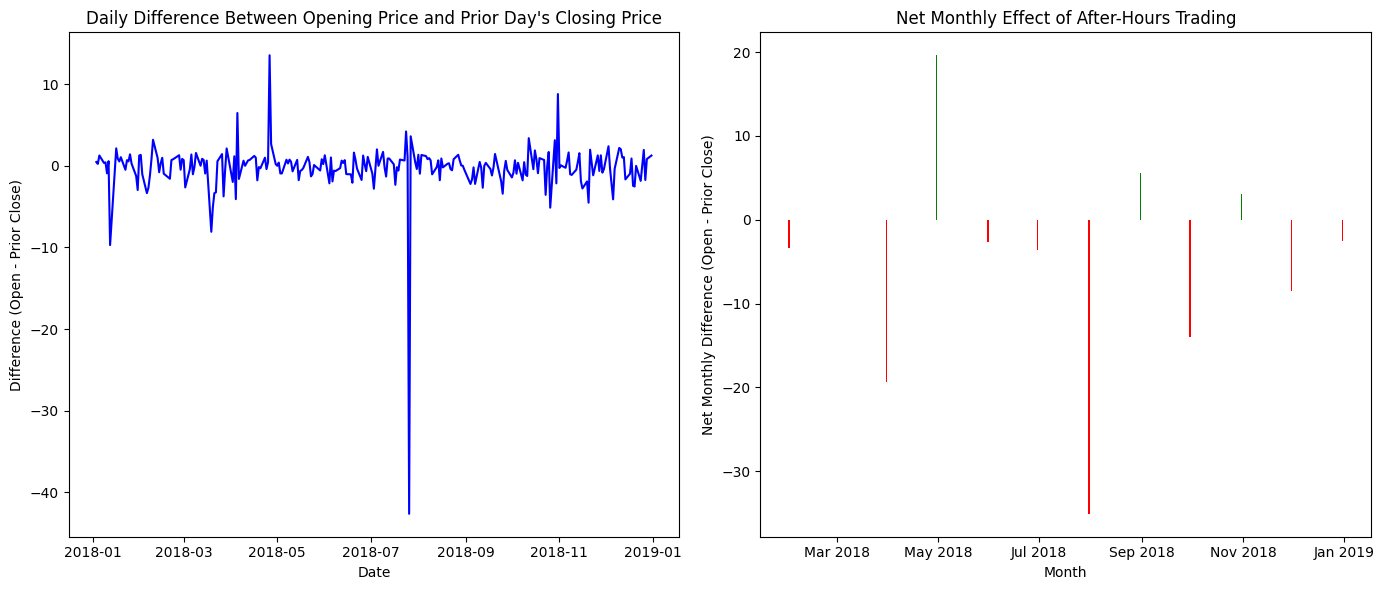

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

fb = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

fb['prior_close'] = fb['close'].shift(1)
fb['daily_diff'] = fb['open'] - fb['prior_close']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(fb.index, fb['daily_diff'], color='blue')
axes[0].set_title('Daily Difference Between Opening Price and Prior Day\'s Closing Price')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Difference (Open - Prior Close)')

monthly_diff = fb['daily_diff'].resample('M').sum()

colors = ['green' if x >= 0 else 'red' for x in monthly_diff]

axes[1].bar(monthly_diff.index, monthly_diff, color=colors)
axes[1].set_title('Net Monthly Effect of After-Hours Trading')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Net Monthly Difference (Open - Prior Close)')
axes[1].xaxis.set_major_formatter(DateFormatter('%b %Y'))

plt.tight_layout()

plt.show()
